In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict,  cross_val_score

In [2]:
#importing MNIST dataset with handwritten digits 

# from sklearn.datasets import fetch_openml
# df = fetch_openml("mnist_784", version=1)

# downloading mnist data every time is ineffective, saving them once as a file then reading them is much faster

# with open("data.pickle", "wb") as f:
#     pickle.dump(df, f)

In [3]:
#load data
with open("data.pickle", "rb") as f:
    df = pickle.load(f)

In [4]:
#dividing dataset into data and target datasets
X, y = np.array(df["data"]), np.array(df["target"])
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
#y data are str type, let's transform it
print(type(y[0]))
y = y.astype("uint8")
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


In [8]:
#distribution of the number of digits in a data set
for number in range(10):
    print(f"{number}: {len(y[y==number])/len(y) * 100: .3f}%")
#it seems that dataset is not very skewed, that's good :)

0:  9.861%
1:  11.253%
2:  9.986%
3:  10.201%
4:  9.749%
5:  9.019%
6:  9.823%
7:  10.419%
8:  9.750%
9:  9.940%


In [9]:
#checking if there are nan values
print(np.isnan(X).sum())
print(np.isnan(y).sum())

0
0


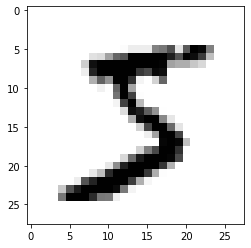

In [10]:
#showing sample image of number
plt.imshow(X[0].reshape(28,28), cmap = "binary")
plt.show()

In [11]:
#splitting datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/7, random_state=42)

## model

In [13]:
#at first it would be a good idea to find the most promising model
knn_clf = KNeighborsClassifier()
sgd_clf = SGDClassifier()
rfg_clf = RandomForestClassifier()

print("knn model accuracy:", cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy"))
print("sgd model accuracy:", cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy"))
print("rfg model accuracy:", cross_val_score(rfg_clf, X_train, y_train, cv=3, scoring="accuracy"))

knn model accuracy: [0.9673  0.96945 0.96735]
sgd model accuracy: [0.8614  0.88205 0.8757 ]
rfg model accuracy: [0.9658  0.96815 0.96545]


In [49]:
#the knn model seems to be the most promising, let's tune the hyperparameters
#building pipeline 
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier()),
])

params= {}
params["scaler"] = [StandardScaler(), MinMaxScaler(), Normalizer()] 
params["classifier"] = [KNeighborsClassifier()]
# params["classifier__n_neighbors"] = [1,3,5]
# params["classifier__weigts"] = ["uniform", "distance"]
print(params)


grid = GridSearchCV(pipeline, params, cv=3, scoring = "accuracy", n_jobs=-1)

{'scaler': [StandardScaler(), MinMaxScaler(), Normalizer()], 'classifier': [KNeighborsClassifier()]}


In [50]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    Normalizer()]},
             scoring='accuracy')

In [54]:
evaluation = pd.DataFrame(data=grid.cv_results_)
evaluation

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.464453,0.219209,291.080514,1.176286,KNeighborsClassifier(),StandardScaler(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.9396,0.94300,0.93940,0.940667,0.001652,3
1,1.771013,0.025511,280.357000,4.864215,KNeighborsClassifier(),MinMaxScaler(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.9673,0.96945,0.96735,0.968033,0.001002,2
2,1.859514,0.344342,217.482106,105.257549,KNeighborsClassifier(),Normalizer(),"{'classifier': KNeighborsClassifier(), 'scaler...",0.9733,0.97440,0.97190,0.973200,0.001023,1


In [55]:
#I have the results first basic results
print(f"best estimator: {grid.best_estimator_}")
print(f"best params: {grid.best_params_}")
print(f"best accuracy: {grid.best_score_: .3f}%")


best estimator: Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', KNeighborsClassifier())])
best params: {'classifier': KNeighborsClassifier(), 'scaler': Normalizer()}
best accuracy:  0.973%


# WORK IN PROGRESS...